In [1]:
import tensorflow as tf
tf.__version__

'2.4.1'

In [2]:
import numpy as np
import pandas as pd
import os

import cv2

import  albumentations as albu
from albumentations import Compose,ShiftScaleRotate,Resize
from albumentations.pytorch import ToTensor

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

from sklearn.metrics import confusion_matrix
import itertools
from sklearn.metrics import classification_report

import shutil

import matplotlib.pyplot as plt




# Helper Function

In [3]:
def plot_confusion_matrix(cm,classes,normnalize=False,title='Confusion matrix',
                         cmap=plt.cm.Blues):
    if normnalize:
        cm=cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]
        print("Normalized Confusion matrix ")
    else:
        print("Cpnfusion matrix,with out Normalization")
        print(cm)
        plt.imshow(cm,interpolation='nearest',cmap=cmap)
        plt.title(title)
        plt.colorbar()
        tick_marks=np.arange(len(classes))
        plt.xticks(tick_marks,classes,rotation=45)
        plt.yticks(tick_marks,classes)
        fmt='.2f' if normnalize else 'd'
        thresh=cm.max()/2.
        for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
            plt.text(j,i,format(cm[i,j],fmt),horizontalalignment="center",
                    color="white" if cm[i,j]> thresh else "black")
        plt.ylabel('true label')
        plt.xlabel('predicated label')
        plt.tight_layout()

## Preapre the data

### Creating the DataFrame containg all image

In [4]:
os.listdir('rice_leaf_diseases')

['Bacterial leaf blight', 'Brown spot', 'Leaf smut']

In [5]:
bacterial_leaf_blight_list=\
os.listdir(r'rice_leaf_diseases\Bacterial leaf blight')
brown_spot_list=\
os.listdir(r'rice_leaf_diseases\Brown spot')
leaf_smut_list=\
os.listdir(r'rice_leaf_diseases\Leaf smut')

print(len(bacterial_leaf_blight_list))
print(len(brown_spot_list))
print(len(leaf_smut_list))

40
40
40


In [6]:
#create the train and val set
df_bacterial_leaf_blight=pd.DataFrame(bacterial_leaf_blight_list,columns=['image'])
df_bacterial_leaf_blight['target']='bacterial_leaf_blight'

df_brown_spot=pd.DataFrame(brown_spot_list,columns=['image'])
df_brown_spot['target']='brown_spot'

df_leaf_smut=pd.DataFrame(leaf_smut_list,columns=['image'])
df_leaf_smut['target']='leaf_smut'

In [7]:
df_bacterial_leaf_blight.head()

,image,target
0,DSC_0365.JPG,bacterial_leaf_blight
1,DSC_0366.jpg,bacterial_leaf_blight
2,DSC_0367.JPG,bacterial_leaf_blight
3,DSC_0370.jpg,bacterial_leaf_blight
4,DSC_0372.JPG,bacterial_leaf_blight


## Each Class the Value 5

In [8]:
df_bacterial_leaf_blight_val=df_bacterial_leaf_blight.sample(n=5,random_state=1)
df_brown_spot_val=df_brown_spot.sample(n=5,random_state=1)
df_leaf_smut_val=df_leaf_smut.sample(n=5,random_state=1)

print(len(df_bacterial_leaf_blight_val))
print(len(df_brown_spot_val))
print(len(df_leaf_smut_val))

5
5
5


## Create the Training set of each Class


In [9]:
val_list=list(df_bacterial_leaf_blight_val['image'])
df_bacterial_leaf_blight_train=df_bacterial_leaf_blight[~df_bacterial_leaf_blight['image'].isin(val_list)]


val_list=list(df_brown_spot_val['image'])
df_brown_spot_train=df_brown_spot[~df_brown_spot['image'].isin(val_list)]

val_list=list(df_leaf_smut_val['image'])
df_leaf_smut_train=df_leaf_smut[~df_leaf_smut['image'].isin(val_list)]



print(len(df_bacterial_leaf_blight_train))
print(len(df_brown_spot_train))
print(len(df_leaf_smut_train))

35
35
35


## Create the Main Data frame Train,Val,Data

In [10]:
df_data=shuffle(pd.concat([df_bacterial_leaf_blight,df_brown_spot,df_leaf_smut],axis=0).reset_index(drop=True))
df_data

df_train=shuffle(pd.concat([df_bacterial_leaf_blight_train,df_brown_spot_train,df_leaf_smut_train],axis=0).reset_index(drop=True))

df_val=shuffle(pd.concat([df_bacterial_leaf_blight_val,df_brown_spot_val,df_leaf_smut_val],axis=0).reset_index(drop=True))

print(df_data.shape)
print(df_train.shape)
print(df_val.shape)


(120, 2)
(105, 2)
(15, 2)


In [11]:
df_data['target'].value_counts()


leaf_smut                40
bacterial_leaf_blight    40
brown_spot               40
Name: target, dtype: int64

In [12]:
df_train['target'].value_counts()

leaf_smut                35
bacterial_leaf_blight    35
brown_spot               35
Name: target, dtype: int64

In [13]:
df_val['target'].value_counts()

leaf_smut                5
bacterial_leaf_blight    5
brown_spot               5
Name: target, dtype: int64

In [14]:
#create the target  by the index
#combine in val and train

val_len=len(df_val)

val_train=len(df_train)
df_combine=pd.concat([df_val,df_train],axis=0).reset_index(drop=True)

df_combine=pd.get_dummies(df_combine, columns=['target'])


df_val=df_combine[:val_len]
df_train=df_combine[val_len:]
print(df_train.shape)
print(df_val.shape)

(105, 4)
(15, 4)


In [15]:
df_combine.head()

,image,target_bacterial_leaf_blight,target_brown_spot,target_leaf_smut
0,DSC_0323.JPG,0,1,0
1,DSC_0105.jpg,0,1,0
2,DSC_0304.JPG,0,1,0
3,DSC_0309.JPG,0,0,1
4,DSC_0367.JPG,1,0,0


## Save the Data freame in csv

In [16]:
#csv file store
df_combine.to_csv('df_combine.csv',index=False)
df_train.to_csv('df_train.csv',index=False)
df_val.to_csv('df_val.csv',index=False)

In [17]:
#zip file store in csv
df_combine.to_csv('zip\df_combine.csv.gz',compression='gzip',index=False)
df_train.to_csv('zip\df_train.csv.gz',compression='gzip',index=False)
df_val.to_csv('zip\df_val.csv.gz',compression='gzip',index=False)

In [18]:
!dir

 Volume in drive C has no label.
 Volume Serial Number is 04AD-6240

 Directory of C:\Users\Sanjay Baraiya\project of self learn\Rice Leaf Disease Detection Project

17-03-2021  10.20 AM    <DIR>          .
17-03-2021  10.20 AM    <DIR>          ..
16-03-2021  10.39 AM    <DIR>          .idea
01-03-2021  02.15 PM    <DIR>          .ipynb_checkpoints
15-03-2021  08.18 PM             1,443 app.py
17-03-2021  10.20 AM             2,471 df_combine.csv
17-03-2021  10.20 AM             2,171 df_train.csv
17-03-2021  10.20 AM               371 df_val.csv
16-03-2021  04.47 PM        51,373,984 model.h5
17-03-2021  09.47 AM           716,653 Rice Leaf Disease Detection.ipynb
15-03-2021  09.08 PM    <DIR>          rice_leaf_diseases
15-03-2021  06.42 PM    <DIR>          static
16-03-2021  10.37 AM    <DIR>          templates
16-03-2021  10.30 AM    <DIR>          uploads
17-03-2021  10.20 AM    <DIR>          zip
               6 File(s)     52,097,093 bytes
               9 Dir(s)  79,769,997,

In [19]:
#create image directoey
image_dir='image'
os.mkdir(image_dir)
!dir

 Volume in drive C has no label.
 Volume Serial Number is 04AD-6240

 Directory of C:\Users\Sanjay Baraiya\project of self learn\Rice Leaf Disease Detection Project

17-03-2021  10.20 AM    <DIR>          .
17-03-2021  10.20 AM    <DIR>          ..
16-03-2021  10.39 AM    <DIR>          .idea
01-03-2021  02.15 PM    <DIR>          .ipynb_checkpoints
15-03-2021  08.18 PM             1,443 app.py
17-03-2021  10.20 AM             2,471 df_combine.csv
17-03-2021  10.20 AM             2,171 df_train.csv
17-03-2021  10.20 AM               371 df_val.csv
17-03-2021  10.20 AM    <DIR>          image
16-03-2021  04.47 PM        51,373,984 model.h5
17-03-2021  09.47 AM           716,653 Rice Leaf Disease Detection.ipynb
15-03-2021  09.08 PM    <DIR>          rice_leaf_diseases
15-03-2021  06.42 PM    <DIR>          static
16-03-2021  10.37 AM    <DIR>          templates
16-03-2021  10.30 AM    <DIR>          uploads
17-03-2021  10.20 AM    <DIR>          zip
               6 File(s)     52,097,0

## Transfer the Image

In [20]:
for fname in leaf_smut_list:
    path='rice_leaf_diseases/Leaf smut'
    src=os.path.join(path,fname)
    dst=os.path.join(image_dir,fname)
    shutil.copyfile(src,dst)
    
    
for fname in brown_spot_list:
    path='rice_leaf_diseases/Brown spot'
    src=os.path.join(path,fname)
    dst=os.path.join(image_dir,fname)
    shutil.copyfile(src,dst)
for fname in bacterial_leaf_blight_list:
    path='rice_leaf_diseases/Bacterial leaf blight'
    src=os.path.join(path,fname)
    dst=os.path.join(image_dir,fname)
    shutil.copyfile(src,dst)

In [21]:
len(os.listdir('image'))


120

## display image  in subplot

Text(0.5, 0, 'Bacterial leaf blight')

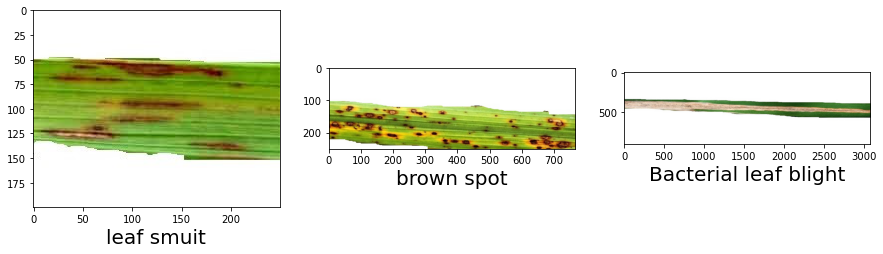

In [22]:
plt.figure(figsize=(15,15))

#image1 
plt.subplot(1,3,1)
item='DSC_0512.jpg'
path='rice_leaf_diseases/Leaf smut/'+ item
image=plt.imread(path)
plt.imshow(image)
plt.xlabel('leaf smuit',fontsize=20)


#image2
plt.subplot(1,3,2)
item='DSC_0100.jpg'
path='rice_leaf_diseases/Brown spot/'+ item
image=plt.imread(path)
plt.imshow(image)
plt.xlabel('brown spot',fontsize=20)



#image3
plt.subplot(1,3,3)
item='DSC_0701.jpg'
path='rice_leaf_diseases/Bacterial leaf blight/'+ item
image=plt.imread(path)
plt.imshow(image)
plt.xlabel('Bacterial leaf blight',fontsize=20)

## Augmentaion on image 

In [23]:
def augment_image(augentation,image):
    
    aug_image_dict=augentation(image=image)
    image_matrix=aug_image_dict['image']
    
    return image_matrix
    

In [24]:
aug_type=albu.Compose([
    albu.HorizontalFlip(),
    albu.OneOf([
        albu.HorizontalFlip(),
        albu.VerticalFlip(),
    ],p=0.8),
albu.OneOf([
    albu.RandomContrast(),
    albu.RandomGamma(),
    albu.RandomBrightness(),
],p=0.3),
albu.OneOf([
    albu.ElasticTransform(alpha=120,sigma=120*0.05,alpha_affine=120*0.03),
    albu.GridDistortion(),
    albu.OpticalDistortion(distort_limit=2,shift_limit=0.5),
],p=0.3),
albu.ShiftScaleRotate()
])

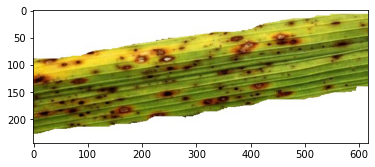

In [25]:
#show the image
path='image/'
image_list=os.listdir('image')
fname=image_list[1]
image_path=path+fname
image=plt.imread(image_path)
plt.imshow(image)

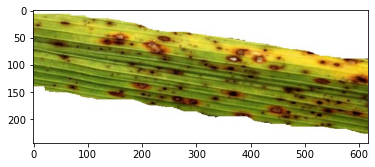

In [26]:
aug_image=augment_image(aug_type,image)
plt.imshow(aug_image)


## Buld the data generators

## [1] train Data Generators

In [27]:
df_train.head()

,image,target_bacterial_leaf_blight,target_brown_spot,target_leaf_smut
15,DSC_0107.jpg,0,1,0
16,DSC_0308.JPG,0,0,1
17,DSC_0335.JPG,0,0,1
18,DSC_0406.JPG,1,0,0
19,DSC_0313.JPG,0,0,1


In [28]:
def train_generator(batch_size=8):
    while True:
        for df in pd.read_csv('df_train.csv',chunksize=batch_size):
            image_id_list=list(df['image'])
            
            x_train=np.zeros((len(df),224,224,3),dtype=np.uint8)
            
            for i in range(0,len(image_id_list)):
                image_id=image_id_list[i]
                path='image/'+image_id
                image=cv2.imread(path)
                image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
                image=cv2.resize(image,(224,224))
                
                
                #y_train create
                
                cols=['target_bacterial_leaf_blight','target_brown_spot','target_leaf_smut']
                y_train=df[cols]
                y_train=np.asarray(y_train)
                
                aug_image=augment_image(aug_type,image)
                x_train[i]=aug_image
                
                x_train=x_train/255
                
                yield x_train,y_train

In [29]:
#test the generatoir
train_gen=train_generator(batch_size=8)
X_train,Y_train=next(train_gen)
print(X_train.shape)
print(Y_train.shape)

(8, 224, 224, 3)
(8, 3)


In [30]:
Y_train

array([[0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0]], dtype=int64)

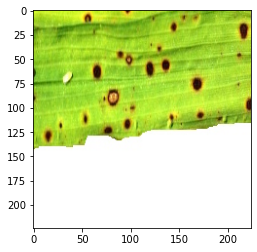

In [31]:
image=X_train[0,:,:,:]
plt.imshow(image)

# Values Generator

In [32]:
def val_generator(batch_size=5):
    while True:
        for df in pd.read_csv('df_val.csv',chunksize=batch_size):
            image_id_list=list(df['image'])
            
            x_val=np.zeros((len(df),224,224,3),dtype=np.uint8)
            
            for i in range(0,len(image_id_list)):
                image_id=image_id_list[i]
                path='image/'+image_id
                image=cv2.imread(path)
                image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
                image=cv2.resize(image,(224,224))
                
                
                #y_train create
                
                cols=['target_bacterial_leaf_blight','target_brown_spot','target_leaf_smut']
                y_val=df[cols]
                y_val=np.asarray(y_val)
                
                aug_image=augment_image(aug_type,image)
                x_val[i]=aug_image
                
                x_val=x_val/255
                
                yield x_val,y_val
        

In [33]:
#values generator
val_gen=val_generator(batch_size=5)
X_val,Y_val=next(val_gen)
print(X_val.shape)
print(Y_val.shape)

(5, 224, 224, 3)
(5, 3)


In [34]:
Y_val

array([[0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0]], dtype=int64)

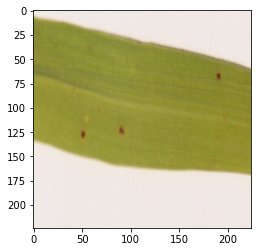

In [35]:
image=X_val[0,:,:,:]
plt.imshow(image)

# Test Generator

In [36]:
def test_generator(batch_size=5):
    while True:
        for df in pd.read_csv('df_val.csv',chunksize=batch_size):
            image_id_list=list(df['image'])
            
            x_test=np.zeros((len(df),224,224,3),dtype=np.uint8)
            
            for i in range(0,len(image_id_list)):
                image_id=image_id_list[i]
                path='image/'+image_id
                image=cv2.imread(path)
                image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
                image=cv2.resize(image,(224,224))
                x_test[i]=image
                
              
                
                x_test=x_test/255
                
                yield x_test
        

In [37]:
#values generator
test_gen=test_generator(batch_size=5)
x_test=next(test_gen)
print(x_test.shape)


(5, 224, 224, 3)


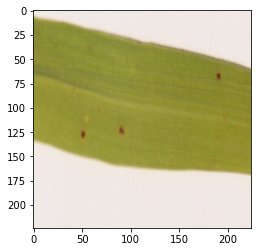

In [38]:
image=X_val[0,:,:,:]
plt.imshow(image)

## Model Preration 

In [39]:
from tensorflow.keras.models import Model,load_model
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_accuracy

from tensorflow.keras.callbacks import (EarlyStopping,ModelCheckpoint,ReduceLROnPlateau,CSVLogger,LearningRateScheduler)

In [40]:
from tensorflow.keras.applications.mobilenet import MobileNet
model=MobileNet(weights='imagenet')
x=model.layers[-2].output

prediction=Dense(3,activation='softmax')(x)
model=Model(inputs=model.input,outputs=prediction)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0     

## Train the model

In [62]:
TRAIN_BATCH_SIZE=5
VAL_BATCH_SIZE=4
num_train_sample=len(df_train)
num_val_sample=len(df_val)
train_batch_size=TRAIN_BATCH_SIZE 
val_batch_size=VAL_BATCH_SIZE


train_steps=np.ceil(num_train_sample/train_batch_size)
val_step=np.ceil(num_val_sample/val_batch_size)

In [63]:
#initialize the generators
train_gen=train_generator(batch_size=TRAIN_BATCH_SIZE)
val_gen=val_generator(batch_size=VAL_BATCH_SIZE)
 
model.compile(
    
Adam(lr=0.0001),
loss='categorical_crossentropy',
    
    
metrics=['accuracy'],)

filepath="model.h5"
checkpoint=ModelCheckpoint(filepath,monitor='val_accuracy',verbose=1,save_best_only=True,mode='max')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, 
                                   verbose=1, mode='min')
    
log_fname='training_log.csv'
csv_logger=CSVLogger(filename=log_fname,separator=',',append=False)
calbacks_list=[checkpoint,csv_logger]
history=model.fit_generator(train_gen,steps_per_epoch=train_steps,epochs=100,validation_data=val_gen,validation_steps=val_step,
                            verbose=1,callbacks=calbacks_list)





Epoch 1/100
21/21 [==============================] - 20s 742ms/step - loss: 0.8209 - accuracy: 0.4814 - val_loss: 10.0302 - val_accuracy: 0.1875

Epoch 00001: val_accuracy improved from -inf to 0.18750, saving model to model.h5
Epoch 2/100
21/21 [==============================] - 15s 722ms/step - loss: 0.7592 - accuracy: 0.5283 - val_loss: 1.1490 - val_accuracy: 0.6875

Epoch 00002: val_accuracy improved from 0.18750 to 0.68750, saving model to model.h5
Epoch 3/100
21/21 [==============================] - 15s 715ms/step - loss: 0.7540 - accuracy: 0.5955 - val_loss: 1.8314 - val_accuracy: 0.4286

Epoch 00003: val_accuracy did not improve from 0.68750
Epoch 4/100
21/21 [==============================] - 15s 713ms/step - loss: 0.7607 - accuracy: 0.5669 - val_loss: 1.6026 - val_accuracy: 0.5000

Epoch 00004: val_accuracy did not improve from 0.68750
Epoch 5/100
21/21 [==============================] - 15s 724ms/step - loss: 0.7310 - accuracy: 0.6983 - val_loss: 4.8331 - val_accuracy: 0.562

21/21 [==============================] - 15s 730ms/step - loss: 0.7802 - accuracy: 0.5905 - val_loss: 0.7537 - val_accuracy: 0.5000

Epoch 00041: val_accuracy did not improve from 0.81250
Epoch 42/100
21/21 [==============================] - 15s 735ms/step - loss: 0.7270 - accuracy: 0.6506 - val_loss: 1.5537 - val_accuracy: 0.5714

Epoch 00042: val_accuracy did not improve from 0.81250
Epoch 43/100
21/21 [==============================] - 15s 724ms/step - loss: 0.7637 - accuracy: 0.6026 - val_loss: 3.0741 - val_accuracy: 0.3750

Epoch 00043: val_accuracy did not improve from 0.81250
Epoch 44/100
21/21 [==============================] - 15s 733ms/step - loss: 0.7112 - accuracy: 0.5844 - val_loss: 3.7493 - val_accuracy: 0.4375

Epoch 00044: val_accuracy did not improve from 0.81250
Epoch 45/100
21/21 [==============================] - 15s 725ms/step - loss: 0.9213 - accuracy: 0.6464 - val_loss: 1.8175 - val_accuracy: 0.5000

Epoch 00045: val_accuracy did not improve from 0.81250
Epoch 46

21/21 [==============================] - 15s 725ms/step - loss: 0.7033 - accuracy: 0.7209 - val_loss: 3.7931 - val_accuracy: 0.4375

Epoch 00082: val_accuracy did not improve from 0.81250
Epoch 83/100
21/21 [==============================] - 15s 727ms/step - loss: 0.7593 - accuracy: 0.5827 - val_loss: 3.8299 - val_accuracy: 0.5000

Epoch 00083: val_accuracy did not improve from 0.81250
Epoch 84/100
21/21 [==============================] - 15s 717ms/step - loss: 0.7348 - accuracy: 0.5976 - val_loss: 3.3445 - val_accuracy: 0.5000

Epoch 00084: val_accuracy did not improve from 0.81250
Epoch 85/100
21/21 [==============================] - 15s 731ms/step - loss: 0.8340 - accuracy: 0.6579 - val_loss: 3.7712 - val_accuracy: 0.4375

Epoch 00085: val_accuracy did not improve from 0.81250
Epoch 86/100
21/21 [==============================] - 15s 739ms/step - loss: 0.7837 - accuracy: 0.4911 - val_loss: 0.7421 - val_accuracy: 0.5000

Epoch 00086: val_accuracy did not improve from 0.81250
Epoch 87

In [64]:
# DISPLAY THE TRAINING LOG FILE
train_log=pd.read_csv('training_log.csv')
train_log.head()

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.476190,0.813209,0.187500,10.030188
1,1,0.619048,0.742599,0.687500,1.149005
2,2,0.561905,0.780267,0.428571,1.831368
3,3,0.600000,0.763814,0.500000,1.602648
4,4,0.619048,0.762343,0.562500,4.833070


## Evaluate the Model on the Val Set

In [65]:
model.metrics_names

['loss', 'accuracy']

In [66]:
model.load_weights('model.h5')
val_gen=val_generator(batch_size=1)
val_loss,val_acc=model.evaluate_generator(val_gen,steps=len(df_val))
print('val_loss',val_loss)
print('val_acc',val_acc)

C:\Users\Sanjay Baraiya\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


val_loss 0.6026290059089661
val_acc 0.8666666746139526


## Ploting  the traing curves

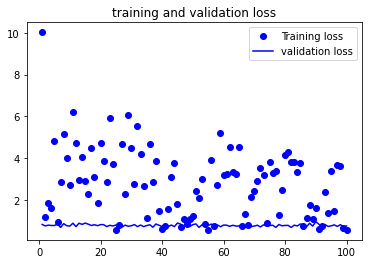

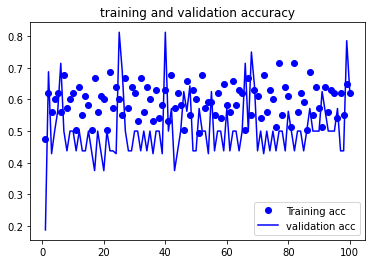

<Figure size 432x288 with 0 Axes>

In [68]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['val_loss']
val_loss=history.history['loss']
ephochs=range(1,len(acc)+1)

plt.plot(ephochs, loss,'bo', label='Training loss')
plt.plot(ephochs, val_loss,'b',label='validation loss')
plt.title('training and validation loss')
plt.legend()
plt.figure()

plt.plot(ephochs,acc,'bo',label='Training acc')
plt.plot(ephochs,val_acc,'b',label='validation acc')
plt.title('training and validation accuracy')
plt.legend()
plt.figure()

plt.show()

### Make a Prediction on the Value Set

In [69]:
test_gen=test_generator(batch_size=1)
preds=model.predict_generator(test_gen,steps=len(df_val),verbose=1)

C:\Users\Sanjay Baraiya\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


15/15 [==============================] - 1s 57ms/step


In [70]:
y_pred=np.argmax(preds,axis=1)
y_pred

array([1, 1, 1, 2, 0, 2, 1, 0, 2, 0, 1, 1, 1, 0, 2], dtype=int64)

In [71]:
cols=['target_bacterial_leaf_blight','target_brown_spot','target_leaf_smut']
y_true=df_val[cols]
y_true=np.asarray(y_true)
y_true=np.argmax(y_true,axis=1)
y_true

array([1, 1, 1, 2, 0, 2, 2, 0, 2, 0, 0, 1, 1, 0, 2], dtype=int64)

#### Comapre y_true and y_pred

In [72]:
print(y_pred)
print(y_true)

[1 1 1 2 0 2 1 0 2 0 1 1 1 0 2]
[1 1 1 2 0 2 2 0 2 0 0 1 1 0 2]


## Confusion Matrix

In [73]:
from sklearn.metrics import confusion_matrix
import itertools
cm=confusion_matrix(y_true,y_pred)

Cpnfusion matrix,with out Normalization
[[4 1 0]
 [0 5 0]
 [0 1 4]]


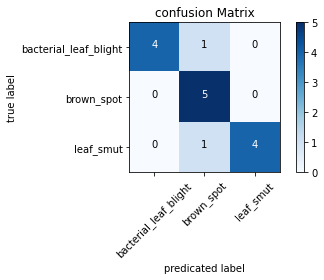

In [74]:
cm_plot_labels=['bacterial_leaf_blight','brown_spot','leaf_smut']

plot_confusion_matrix(cm,cm_plot_labels,title='confusion Matrix')

# Classification Report

In [75]:
from sklearn.metrics import classification_report

report=classification_report(y_true,y_pred,target_names=['bacterial_leaf_blight','brown_spot','leaf_smut'])
print(report)

                       precision    recall  f1-score   support

bacterial_leaf_blight       1.00      0.80      0.89         5
           brown_spot       0.71      1.00      0.83         5
            leaf_smut       1.00      0.80      0.89         5

             accuracy                           0.87        15
            macro avg       0.90      0.87      0.87        15
         weighted avg       0.90      0.87      0.87        15

